In [134]:
import os
import statistics
from typing import Dict, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [135]:
def load_csv_results():
    normal_datasets = ["healthcare", "folktables", "cardio", "reviews"]
    image_dataset = ["sneakers"]
    data_loadings = ["fast_loading", "slow_loading"]
    featurizations = ["featurization_0", "featurization_1", "featurization_2", "featurization_3", "featurization_4"]
    models = ["logistic_regression", "xgboost", "neural_network"]
    result_df = None
    for dataset in normal_datasets:
        for data_loading in data_loadings:
            for featurization in featurizations:
                for model in models:
                    filepath = f"{os.getcwd()}/instrumentation-benchmark-results/" \
                               f"results-instrumentation-{dataset}-{data_loading}-{featurization}-{model}.csv"
                    new_df = pd.read_csv(filepath)
                    new_df['median_total_exec_duration_with_instrum_with_tracking'] = new_df['total_exec_duration_with_instrum_with_tracking'].median()
                    new_df['median_total_exec_duration_with_instrum_without_tracking'] = new_df['total_exec_duration_with_instrum_without_tracking'].median()
                    new_df['median_total_exec_duration_without_instrum_main_func'] = new_df['total_exec_duration_without_instrum_main_func'].median()
                    new_df['median_total_exec_duration_without_instrum_load_ast_compile'] = new_df['total_exec_duration_without_instrum_load_ast_compile'].median()
                    new_df['median_overhead_with_tracking_vs_main_func'] = new_df['median_total_exec_duration_with_instrum_with_tracking'] - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df['median_overhead_without_tracking_vs_main_func'] = new_df['median_total_exec_duration_with_instrum_without_tracking'] - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df['instrum_with_tracking_original_pipeline_estimated'] = new_df['instrum_with_tracking_original_pipeline_estimated'].median()
                    new_df['tracking_diff_of_measurement'] = new_df['instrum_with_tracking_original_pipeline_estimated'].median() - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df = new_df[['median_total_exec_duration_with_instrum_with_tracking',
                                     'median_total_exec_duration_with_instrum_without_tracking',
                                     'median_total_exec_duration_without_instrum_main_func',
                                     'median_total_exec_duration_without_instrum_load_ast_compile',
                                     'median_overhead_with_tracking_vs_main_func',
                                     'median_overhead_without_tracking_vs_main_func',
                                     'tracking_diff_of_measurement',
                                     'instrum_with_tracking_original_pipeline_estimated',
                                     'dataset', 'data_loading', 'featurization', 'model']]
                    new_df = new_df.head(1)
                    new_df = new_df.round(2)
                    if result_df is None:
                        result_df = new_df
                    else:
                        result_df = pd.concat([result_df, new_df], axis=0)
    for dataset in image_dataset:
        for data_loading in data_loadings:
            for featurization in ["image"]:
                for model in ["image"]:
                    filepath = f"{os.getcwd()}/instrumentation-benchmark-results/" \
                               f"results-instrumentation-{dataset}-{data_loading}-{featurization}-{model}.csv"
                    new_df = pd.read_csv(filepath)
                    new_df['median_total_exec_duration_with_instrum_with_tracking'] = new_df['total_exec_duration_with_instrum_with_tracking'].median()
                    new_df['median_total_exec_duration_with_instrum_without_tracking'] = new_df['total_exec_duration_with_instrum_without_tracking'].median()
                    new_df['median_total_exec_duration_without_instrum_main_func'] = new_df['total_exec_duration_without_instrum_main_func'].median()
                    new_df['median_total_exec_duration_without_instrum_load_ast_compile'] = new_df['total_exec_duration_without_instrum_load_ast_compile'].median()
                    new_df['median_overhead_with_tracking_vs_main_func'] = new_df['median_total_exec_duration_with_instrum_with_tracking'] - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df['median_overhead_without_tracking_vs_main_func'] = new_df['median_total_exec_duration_with_instrum_without_tracking'] - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df['instrum_with_tracking_original_pipeline_estimated'] = new_df['instrum_with_tracking_original_pipeline_estimated'].median()
                    new_df['tracking_diff_of_measurement'] = new_df['instrum_with_tracking_original_pipeline_estimated'].median() - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df = new_df[['median_total_exec_duration_with_instrum_with_tracking',
                                     'median_total_exec_duration_with_instrum_without_tracking',
                                     'median_total_exec_duration_without_instrum_main_func',
                                     'median_total_exec_duration_without_instrum_load_ast_compile',
                                     'median_overhead_with_tracking_vs_main_func',
                                     'median_overhead_without_tracking_vs_main_func',
                                     'tracking_diff_of_measurement',
                                     'instrum_with_tracking_original_pipeline_estimated',
                                     'dataset', 'data_loading', 'featurization', 'model']]
                    new_df = new_df.head(1)
                    new_df = new_df.round(2)
                    if result_df is None:
                        result_df = new_df
                    else:
                        result_df = pd.concat([result_df, new_df], axis=0)
    return result_df

In [136]:
median_results = load_csv_results()

In [137]:
median_results_ordered_by_median_overhead = median_results\
    .sort_values(by=['median_overhead_with_tracking_vs_main_func'])
median_results_ordered_by_median_overhead.to_csv(
    f"{os.getcwd()}/instrumentation-benchmark-results/instrumentation_overhead_overview_ordered_by_median_overhead.csv",
    index=True)
median_results_ordered_by_median_overhead

,median_total_exec_duration_with_instrum_with_tracking,median_total_exec_duration_with_instrum_without_tracking,median_total_exec_duration_without_instrum_main_func,median_total_exec_duration_without_instrum_load_ast_compile,median_overhead_with_tracking_vs_main_func,median_overhead_without_tracking_vs_main_func,tracking_diff_of_measurement,instrum_with_tracking_original_pipeline_estimated,dataset,data_loading,featurization,model
0,40247.47,40258.47,40450.81,40019.55,-203.34,-192.34,-520.75,39930.06,reviews,slow_loading,featurization_2,xgboost
0,1396.62,1396.26,1270.78,1280.99,125.84,125.48,-24.39,1246.39,folktables,fast_loading,featurization_0,logistic_regression
0,4100.87,4102.06,3967.05,3960.17,133.82,135.02,-9.90,3957.15,sneakers,fast_loading,image,image
0,4350.49,4355.73,4214.16,4193.56,136.34,141.57,-37.14,4177.02,folktables,fast_loading,featurization_2,neural_network
0,4296.83,4317.16,4157.94,4155.53,138.90,159.22,-6.04,4151.90,sneakers,slow_loading,image,image
...,...,...,...,...,...,...,...,...,...,...,...,...
0,42873.42,42862.47,42314.11,42339.82,559.31,548.36,195.54,42509.65,reviews,fast_loading,featurization_3,xgboost
0,9893.54,9904.81,9324.54,9320.41,568.99,580.27,211.52,9536.06,reviews,slow_loading,featurization_3,logistic_regression
0,43339.14,43334.18,42769.35,42784.73,569.79,564.83,203.04,42972.38,reviews,slow_loading,featurization_3,xgboost
0,15809.98,15778.06,15220.78,15235.52,589.20,557.28,199.04,15419.82,reviews,fast_loading,featurization_3,neural_network


In [138]:
def overhead_box_plot(data, title, with_outliers):
    fig, ax = plt.subplots()

    data_set_row_count_map = {
        'healthcare': 'healthcare\n(#887)',
        'sneakers': 'sneakers\n(#6000)',
        'folktables': 'folktables\n(#29237)',
        'cardio': 'cardio\n(#70000)',
        'reviews': 'reviews\n(#100000)',
    }

    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)


    for group_index, dataset in enumerate(data_set_row_count_map.keys()):
        filtered_data = data[data["dataset"] == dataset]
        y1 = filtered_data['median_overhead_with_tracking_vs_main_func']
        y2 = filtered_data['median_overhead_without_tracking_vs_main_func']
        position = group_index * 3
        box_left = plt.boxplot([y1], positions=[position + 1], widths=0.6, showfliers=with_outliers)
        box_right = plt.boxplot([y2], positions=[position + 2], widths=0.6, showfliers=with_outliers)
        set_box_color(box_left, 'tab:orange')
        set_box_color(box_right, 'tab:blue')
    # ax.legend(fontsize=15, ncol=1)
    # ax.grid(True)
    plt.gca().yaxis.grid(True, linestyle='-.')
    plt.ylabel('instrum. overhead [ms]', fontsize=20)
    if with_outliers is False:
        plt.ylim(0, None)
    # plt.xlabel('# rows', fontsize=26)
    # plt.xlim(0, 45)
    ax.set_xticks([1.5, 4.5, 7.5, 10.5, 13.5])
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xticklabels(data_set_row_count_map.values(), fontsize=18)

    plt.plot([], c='tab:orange', label='tracking')
    plt.plot([], c='tab:blue', label='no track.')
    plt.legend(fontsize=15)

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()

    current_directory = os.getcwd()
    output_directory = os.path.join(current_directory, r'figures')
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

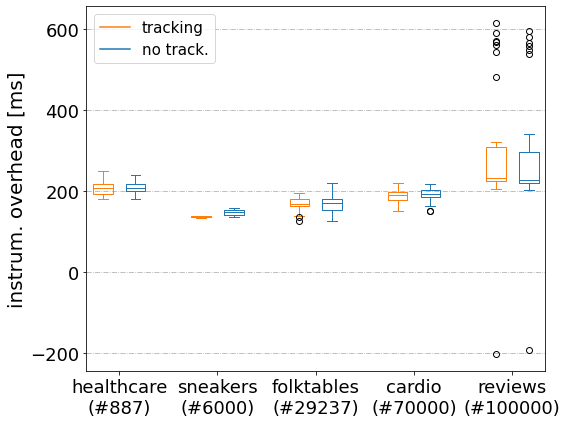

In [139]:
# With outliers
overhead_box_plot(median_results, 'overhead_per_dataset_with_outliers', True)

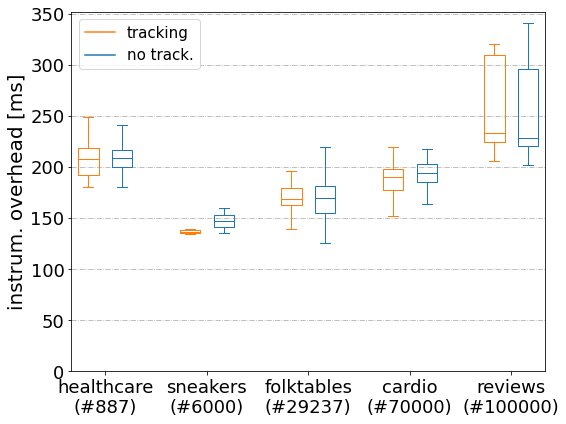

In [140]:
# Without outliers
overhead_box_plot(median_results, 'overhead_per_dataset_without_outliers', False)
